In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [54]:
# import dataset mnist
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [55]:
x_test

# each image a 28*28 2D array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [56]:
x_test[0].shape

(28, 28)

In [57]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [58]:
import matplotlib.pyplot as plt

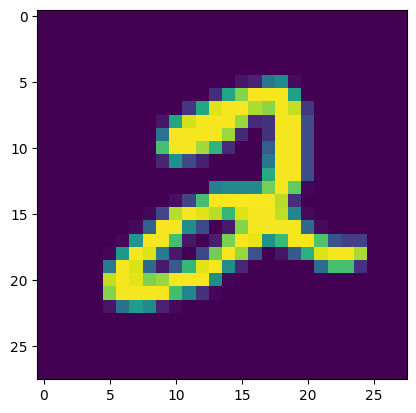

In [59]:
plt.imshow(x_train[5])

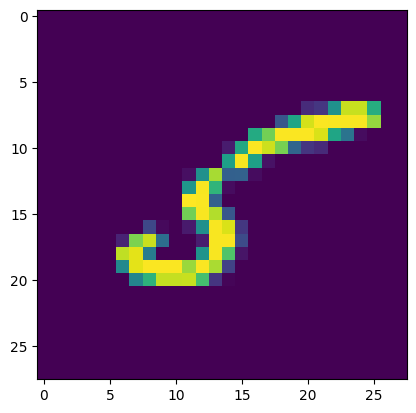

In [10]:
plt.imshow(x_train[11])

In [60]:
from tensorflow.keras.layers import BatchNormalization


In [61]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [62]:
# Model Architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),  # Stabilizes learning
    Dense(64, activation='relu'),  # Added layer
    BatchNormalization(),
    Dense(10, activation='softmax')
])

In [63]:
# Verify label format (integer vs one-hot)
print("Label example:", y_train[0])


Label example: 5


In [64]:
# Compile with learning rate
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy'
    metrics=['accuracy']
)

In [65]:
# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64  # Explicit batch size
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8547 - loss: 0.4922 - val_accuracy: 0.9599 - val_loss: 0.1397
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9653 - loss: 0.1201 - val_accuracy: 0.9667 - val_loss: 0.1130
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9759 - loss: 0.0808 - val_accuracy: 0.9707 - val_loss: 0.0970
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.9694 - val_loss: 0.1022
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9868 - loss: 0.0450 - val_accuracy: 0.9717 - val_loss: 0.0933
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9864 - loss: 0.0416 - val_accuracy: 0.9729 - val_loss: 0.0915
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9734 - val_loss: 0.0931
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.

In [66]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,696 (1.26 MB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 219,542 (857.59 KB)

In [69]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [70]:
y_pred = y_prob.argmax(axis=1)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736

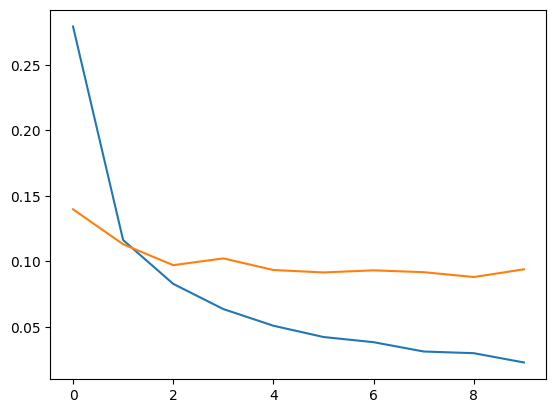

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# there is some overfitting

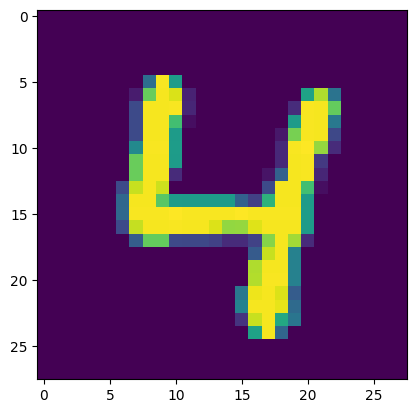

In [76]:
plt.imshow(x_test[56])

In [79]:
model.predict(x_test[56].reshape(1,28,28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([4])

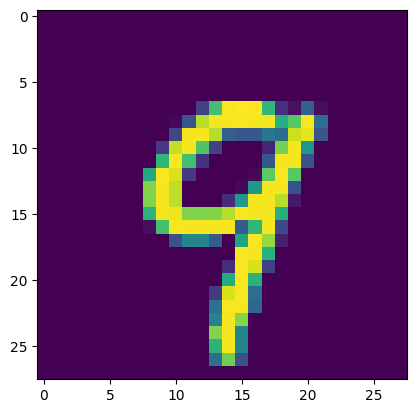

In [83]:
plt.imshow(x_test[12])

In [85]:
model.predict(x_test[12].reshape(1,28,28)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


np.int64(9)